In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Evaluation of Saved Models

If the previous exercise is succesfully completed, you should have two image classification models trained on CIFAR-10 dataset. So far, we have checked the training loss but not the test accuracy. 

You will need to load checkpoints, estimate test accuracies and visualize the results.

## 1. Load the test set.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from copy import deepcopy

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [4]:
USE_GPU = True
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat  ship  ship plane


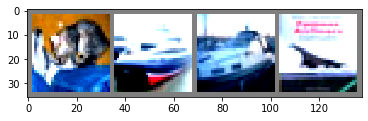

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print ground truth labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. Load ResNet Model, check accuracy.

In [6]:
## TODO: Load your ResNet18 model.
import torchvision.models as models
import torch.nn as nn

resnet_model = models.resnet18(pretrained=False)
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 10)
resnet_model.load_state_dict(torch.load("resnet_cifar.pth"))
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
from evaluation import check_accuracy, check_accuracy_perclass

## TODO: Calculate the test set accuracy
check_accuracy(testloader, resnet_model, device)

## TODO: Calculate the per-class accuracy 
check_accuracy_perclass(testloader, resnet_model, device)

Got 7219 / 10000 correct (72.19)
Accuracy of plane : 73 %
Accuracy of   car : 81 %
Accuracy of  bird : 62 %
Accuracy of   cat : 60 %
Accuracy of  deer : 74 %
Accuracy of   dog : 47 %
Accuracy of  frog : 74 %
Accuracy of horse : 77 %
Accuracy of  ship : 86 %
Accuracy of truck : 85 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    cat  ship plane plane
Prob:  0.878 0.948 0.656 0.745
GndT:    cat  ship  ship plane


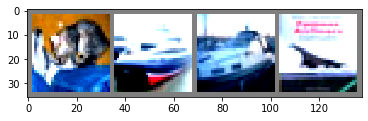

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   deer  frog   car  frog
Prob:  0.754 0.536 0.750 0.706
GndT:   frog  frog   car  frog


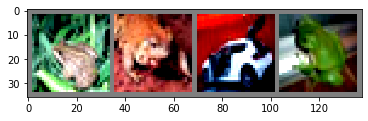

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    cat   car  deer truck
Prob:  0.864 0.776 0.469 0.999
GndT:    cat   car plane truck


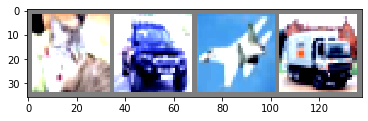

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    cat horse truck  ship
Prob:  0.453 0.996 0.969 0.996
GndT:    dog horse truck  ship


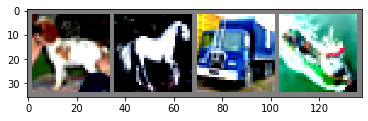

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    dog horse  ship  frog
Prob:  0.703 0.761 0.980 0.984
GndT:    dog horse  ship  frog


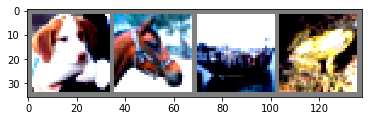

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    car plane  deer truck
Prob:  0.571 0.549 0.945 1.000
GndT:  horse plane  deer truck


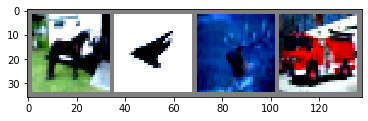

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   deer  deer  deer plane
Prob:  0.998 0.483 0.967 0.415
GndT:    dog  bird  deer plane


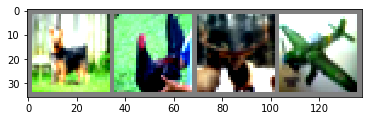

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:  truck  frog  frog   dog
Prob:  0.944 0.994 0.720 0.464
GndT:  truck  frog  frog   dog


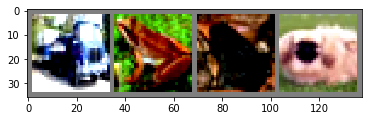

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   deer   cat truck truck
Prob:  0.440 0.302 0.992 0.610
GndT:   deer   dog truck  bird


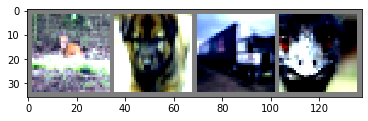

Pred:  horse truck truck   dog
Prob:  0.761 0.655 0.999 0.949
GndT:   deer   car truck   dog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


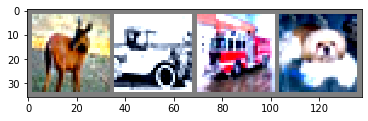

In [8]:
## TODO: Get 10 images from the test set and visualize the prediction scores along with the images.
num_batches = 10
dataiter = iter(testloader)

resnet_model.eval()
for i in range(num_batches):
    image, label = dataiter.next()
    
    image = image.to(device=device)  # move to device, e.g. GPU
    label = label.to(device=device)
    
    output = resnet_model(image)
    
    score = nn.Softmax(dim=1)(output)
    probs, preds = torch.max(score, 1)
    probs = probs.detach().cpu().numpy()

    print('Pred: ', ' '.join('%5s' % classes[preds[j]] for j in range(4)))
    print('Prob: ', ' '.join('%.3f' % probs[j] for j in range(4)))
    print('GndT: ', ' '.join('%5s' % classes[label[j]] for j in range(4)))
    imshow(torchvision.utils.make_grid(image.cpu()))
    plt.show()

## 3. Load MyGraph Model, evaluate on test set

In [9]:
## TODO: Load your ResNet18 model.
from graph import Net

mygraph_model = Net()
mygraph_model.load_state_dict(torch.load('mygraph.pth'))
mygraph_model.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=384, bias=True)
  (fc2): Linear(in_features=384, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)

In [10]:
## TODO: Calculate the test set accuracy
check_accuracy(testloader, mygraph_model, device)

## TODO: Calculate the per-class accuracy 
check_accuracy_perclass(testloader, mygraph_model, device)

Got 7029 / 10000 correct (70.29)
Accuracy of plane : 74 %
Accuracy of   car : 81 %
Accuracy of  bird : 52 %
Accuracy of   cat : 64 %
Accuracy of  deer : 76 %
Accuracy of   dog : 52 %
Accuracy of  frog : 82 %
Accuracy of horse : 71 %
Accuracy of  ship : 75 %
Accuracy of truck : 73 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    cat  ship   car plane
Prob:  0.965 0.845 0.549 0.998
GndT:    cat  ship  ship plane


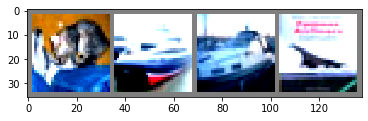

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   frog  frog   car  frog
Prob:  0.999 0.991 0.704 0.956
GndT:   frog  frog   car  frog


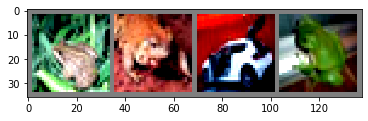

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    cat   car plane truck
Prob:  0.922 0.680 0.861 1.000
GndT:    cat   car plane truck


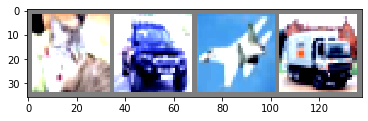

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    dog horse truck  frog
Prob:  0.462 1.000 1.000 0.725
GndT:    dog horse truck  ship


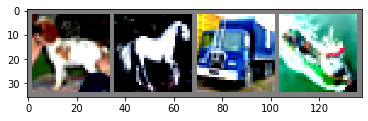

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    cat horse  ship  frog
Prob:  0.960 0.988 0.960 0.985
GndT:    dog horse  ship  frog


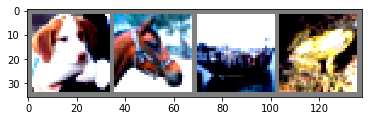

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:    car  bird plane truck
Prob:  0.764 0.997 0.394 1.000
GndT:  horse plane  deer truck


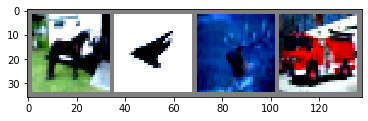

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   deer   dog  deer plane
Prob:  0.998 0.240 0.985 0.937
GndT:    dog  bird  deer plane


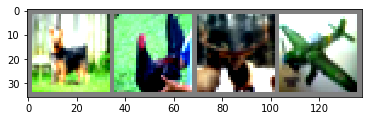

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:  truck  frog  frog   dog
Prob:  0.618 1.000 0.991 0.959
GndT:  truck  frog  frog   dog


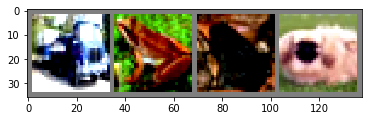

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   deer   cat truck truck
Prob:  0.714 0.642 0.992 0.341
GndT:   deer   dog truck  bird


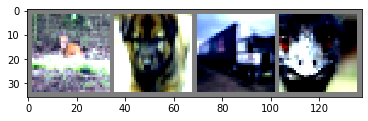

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred:   deer   car truck   dog
Prob:  0.975 0.888 1.000 0.860
GndT:   deer   car truck   dog


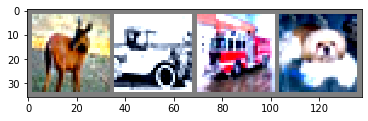

In [11]:
## TODO: Get 10 images from the test set and visualize the prediction scores along with the images.
num_batches = 10
dataiter = iter(testloader)

mygraph_model.eval()
for i in range(num_batches):
    image, label = dataiter.next()
    
    image = image.to(device=device)  # move to device, e.g. GPU
    label = label.to(device=device)
    
    output = mygraph_model(image)
    
    score = nn.Softmax(dim=1)(output)
    probs, preds = torch.max(score, 1)

    print('Pred: ', ' '.join('%5s' % classes[preds[j]] for j in range(4)))
    print('Prob: ', ' '.join('%.3f' % probs[j] for j in range(4)))

    print('GndT: ', ' '.join('%5s' % classes[label[j]] for j in range(4)))
    imshow(torchvision.utils.make_grid(image.cpu()))
    plt.show()

## 4. Report your observations

Compare these models in terms of test accuracy and training runtime. 
Write out your observations. Consider the model architectures, your choice of optimizers, number of epochs. 


## Answer:

The test accuracy of the two models are very similar, where our model is 2% less accuracte on the test dataset (70% against 72%). However, the training runtime of our model is much less than the resnet. As seen from the Training notebook, the number of parameters in our network is more than 10 times less than that of the resnet (922378 against 11181642), which makes our network more efficient as it achieves the same test accuracy on this dataset but with fewer parameters. The choice of optimizers for both networks were the same, and so was the number of epochs for training.